# Auto-encodeurs simples avec Keras

## Vérification de l'utilisation de GPU

Allez dans le menu `Exécution > Modifier le type d'execution` et vérifiez que l'on est bien en Python 3 et que l'accélérateur matériel est configuré sur « GPU ».

In [1]:
!nvidia-smi

Tue Feb 27 13:23:54 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 546.33                 Driver Version: 546.33       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1660 Ti   WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   43C    P8               8W /  80W |    683MiB /  6144MiB |     17%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12521477603190167873
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4172283904
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4466767871535630392
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1660 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


## Import de TensorFlow et des autres librairies nécessaires

In [3]:
import matplotlib.pyplot as plt
import numpy
import scipy.interpolate
import tensorflow as tf
import tensorflow.keras as keras

**Checking the GPU**

In [4]:
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto())

## Chargement de MNIST

Nous allons utiliser un prétraîtement légèrement différent des autres fois : étant donné que nous voulons pouvoir prédire les valeurs données en entrée en sortie (principe de l'auto-encodage), nous allons simplement projeter ces valeurs dans $[0, 1]$ au lieu de $[0, 255]$. Notez qu'habituellement nous ne faisons pas ça : nous normalisons en centrant sur zéro et en divisant par l'écart-type.

In [5]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
nb_classes = 10
input_dim = 28 * 28
X_train = X_train.reshape(-1, input_dim).astype('float32')
X_test = X_test.reshape(-1, input_dim).astype('float32')

# On utilise cette normalisation pour garder les pixel à 0 où ils sont
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
X_train.shape

(60000, 784)

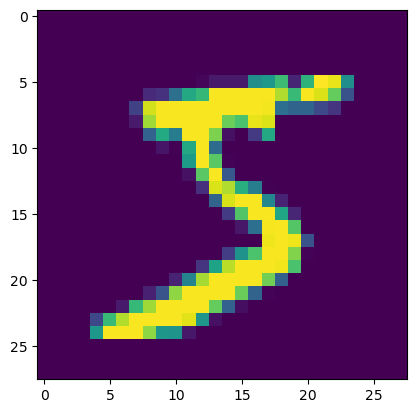

In [7]:
plt.imshow(X_train[0].reshape(28,28))

## Création de l'autoencodeur

Vous devriez être capable de créer le modèle d'autoencoder de base par vous-même.

Attention aux choix des fonctions d'activations et loss !


In [8]:
from keras.layers import Dense  , Dropout , Flatten , Reshape , LeakyReLU 

In [123]:
X_train.shape

(60000, 784)

In [22]:
# Votre code ici
encoding_dim = 4

encoder = keras.Sequential([
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(encoding_dim)
], name="encoder")

decoder = keras.Sequential([
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(input_dim, activation='sigmoid')
], name="decoder")

autoencoder = keras.Sequential([
    encoder,
    decoder
], name="autoencoder")

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.build(input_shape=(None, input_dim))

In [17]:
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 132       
Total params: 29,444
Trainable params: 29,444
Non-trainable params: 0
_________________________________________________________________


In [18]:
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                160       
_________________________________________________________________
dense_13 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_15 (Dense)             (None, 784)               25872     
Total params: 30,224
Trainable params: 30,224
Non-trainable params: 0
_________________________________________________________________


In [19]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder (Sequential)         (None, 4)                 29444     
_________________________________________________________________
decoder (Sequential)         (None, 784)               30224     
Total params: 59,668
Trainable params: 59,668
Non-trainable params: 0
_________________________________________________________________


## Apprentissage

*Écrivez la ligne correspondant à l'apprentissage de votre autoencodeur :*

- *50 itérations devraient suffire*
- *Utilisez un batch de 256*

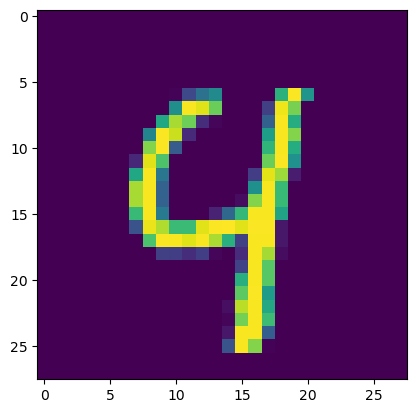

In [59]:
plt.imshow(X_train[(numpy.random.randint(0, 10000, 16))].reshape(4, 4, -1)[0,0].reshape(28,28))

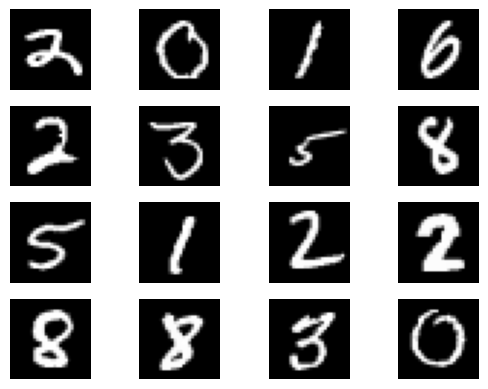

In [105]:
rand = X_test[numpy.random.randint(0, 10000, 16)].reshape(4, 4, -1)
    
fig, axs = plt.subplots(4, 4)

for i in range(4):
    for j in range(4):
        axs[i, j].imshow(rand[i, j].reshape(28,28), cmap = "gray")
        axs[i, j].axis("off")

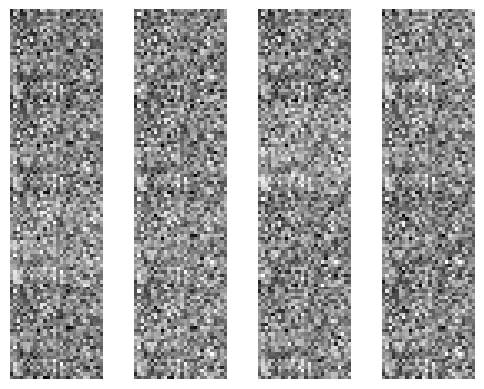

----------- EPOCH 0 -----------
235/235 [==============================] - 2s 5ms/step - loss: 0.3027


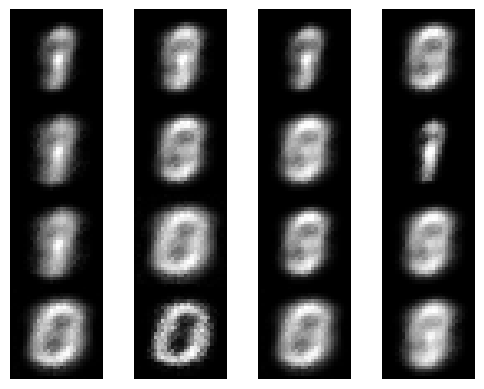

----------- EPOCH 1 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.2333


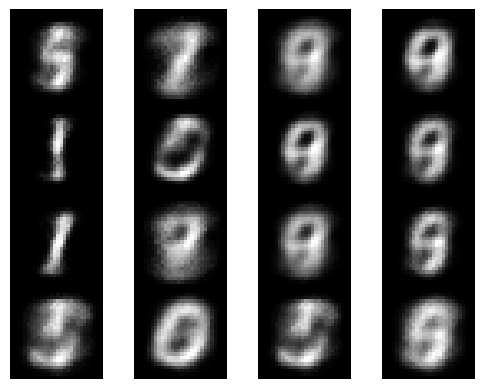

----------- EPOCH 2 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.2093


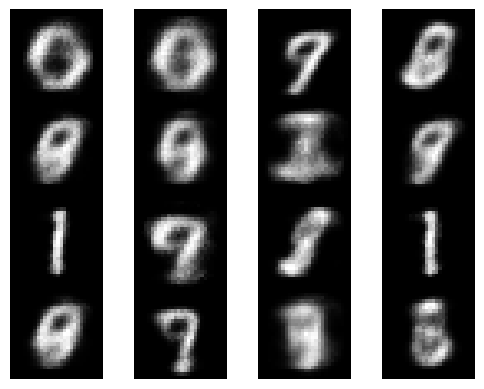

----------- EPOCH 3 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.1900


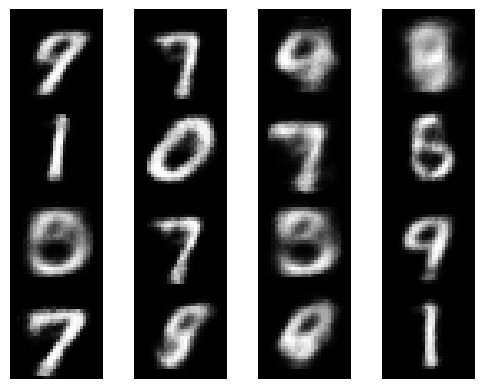

----------- EPOCH 4 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.1820


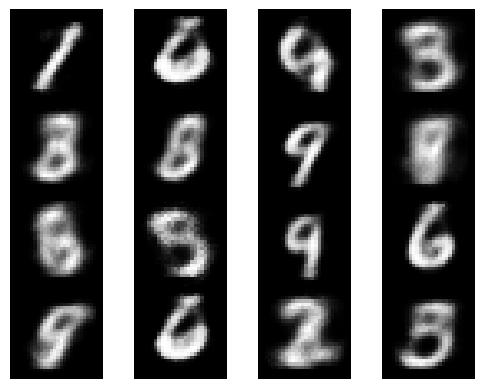

----------- EPOCH 5 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.1776


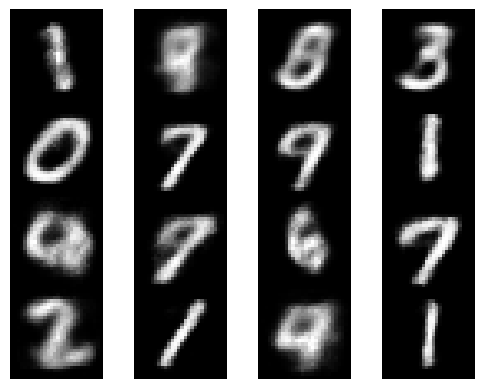

----------- EPOCH 6 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.1750


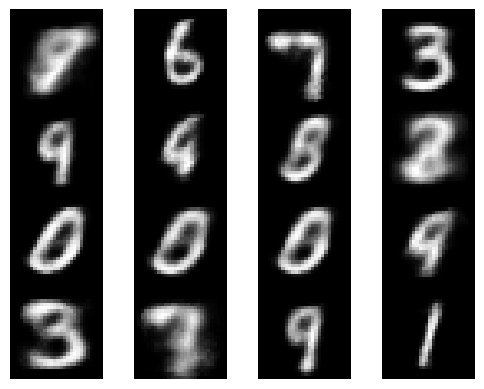

----------- EPOCH 7 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.1729


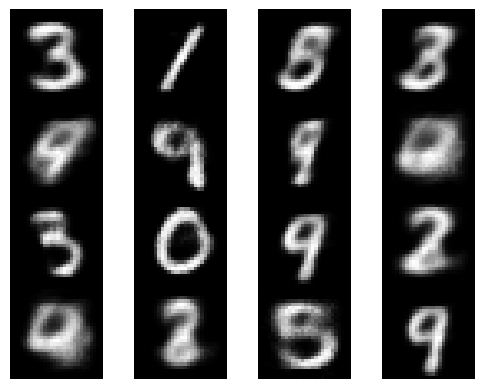

----------- EPOCH 8 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.1714


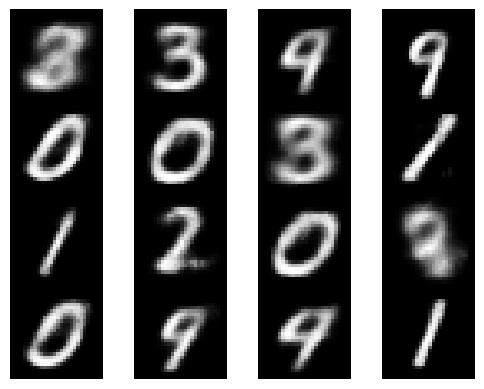

----------- EPOCH 9 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.1701


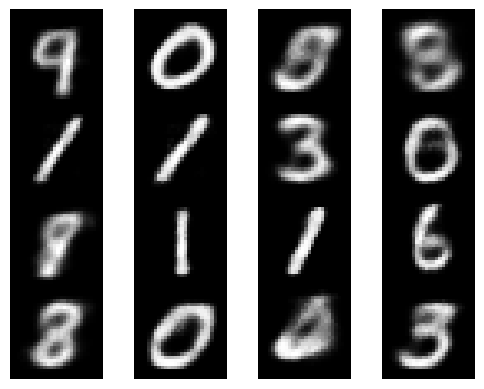

----------- EPOCH 10 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.1689


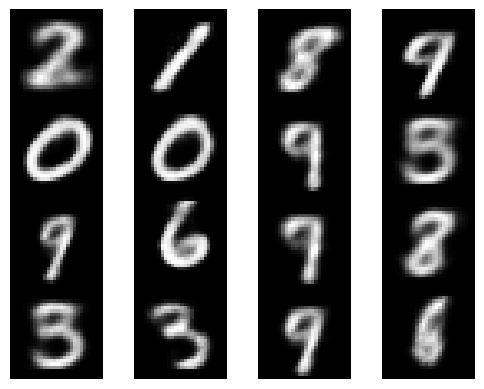

----------- EPOCH 11 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.1679


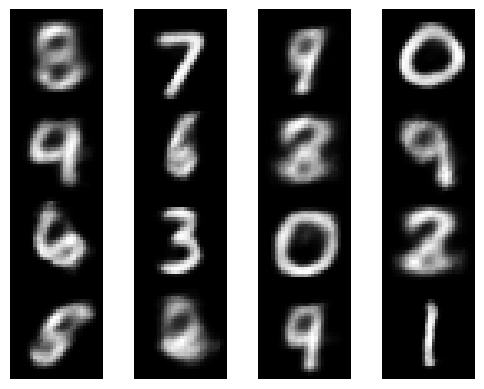

----------- EPOCH 12 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.1670


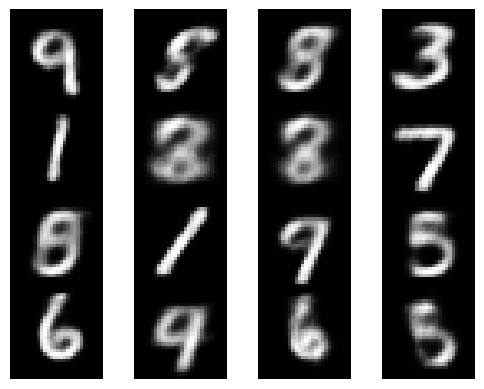

----------- EPOCH 13 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.1661


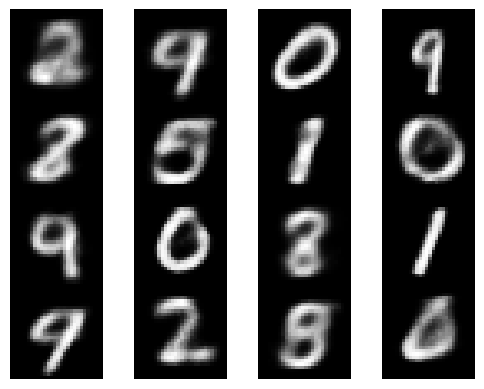

----------- EPOCH 14 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.1653


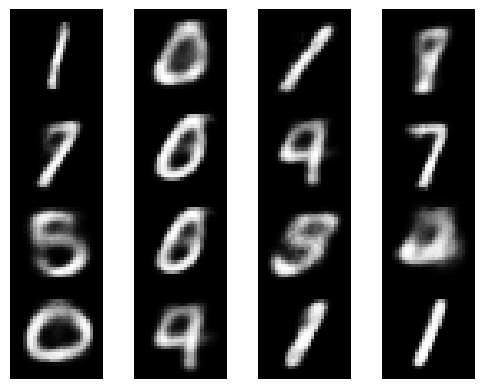

----------- EPOCH 15 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.1645


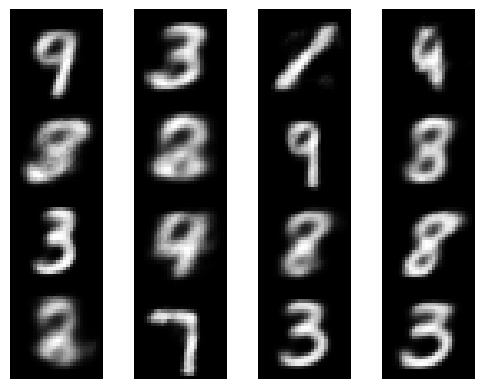

----------- EPOCH 16 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.1639


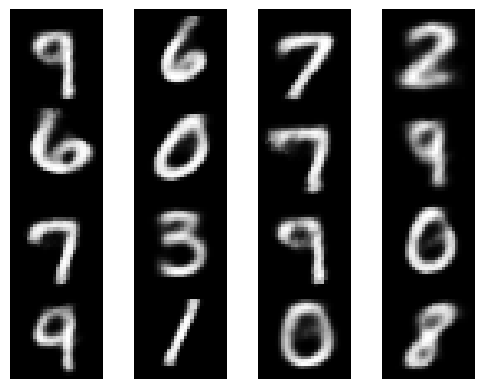

----------- EPOCH 17 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.1633


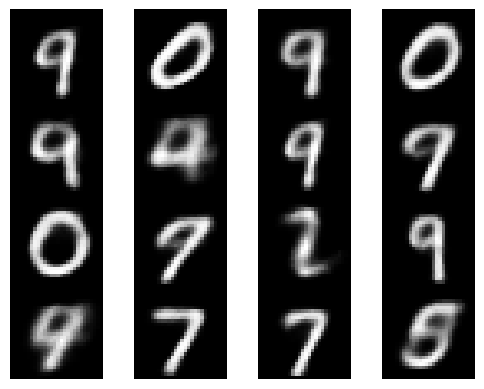

----------- EPOCH 18 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.1627


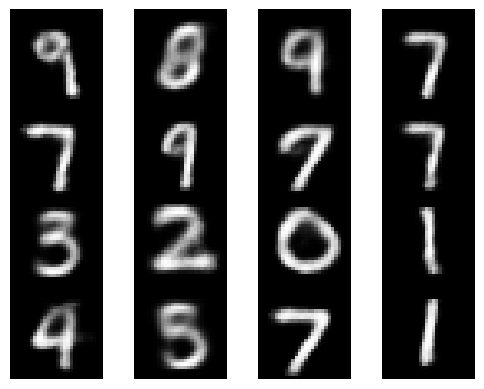

----------- EPOCH 19 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.1622


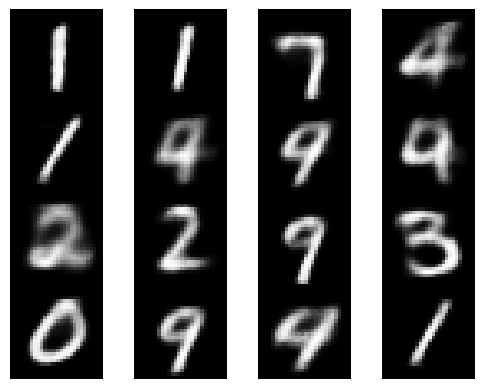

----------- EPOCH 20 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.1617


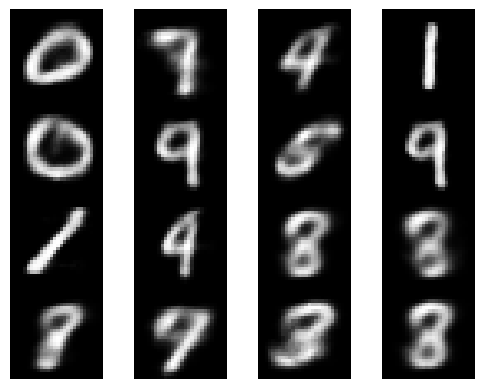

----------- EPOCH 21 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.1614


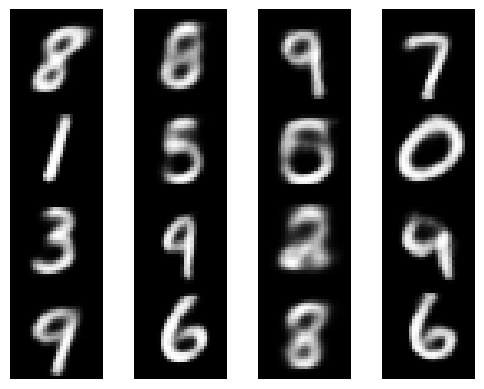

----------- EPOCH 22 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.1609


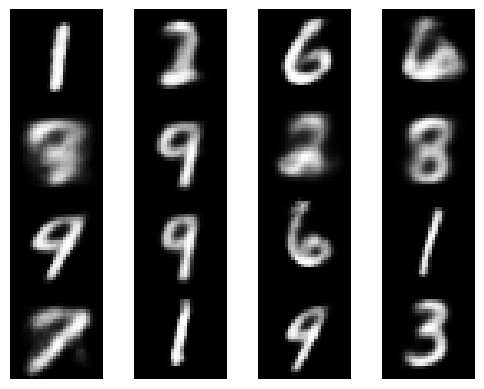

----------- EPOCH 23 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.1605


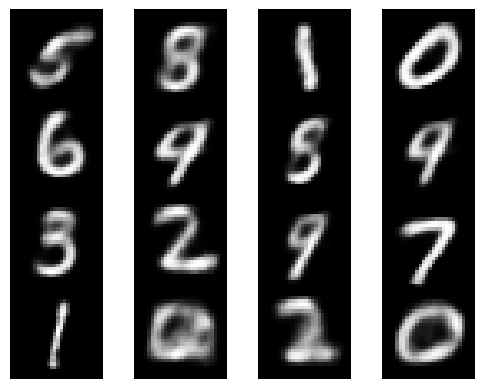

----------- EPOCH 24 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.1601


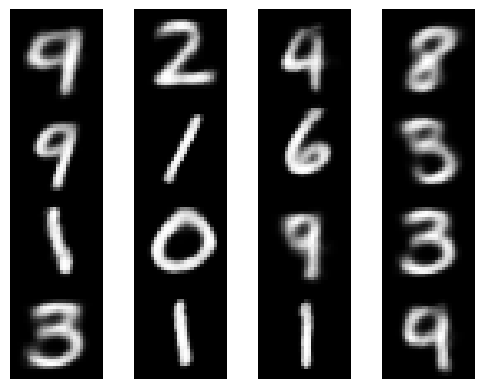

----------- EPOCH 25 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.1597


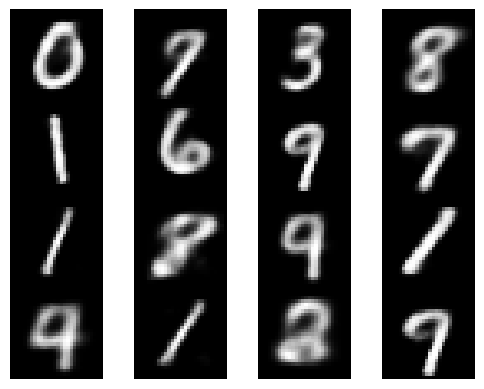

----------- EPOCH 26 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.1593


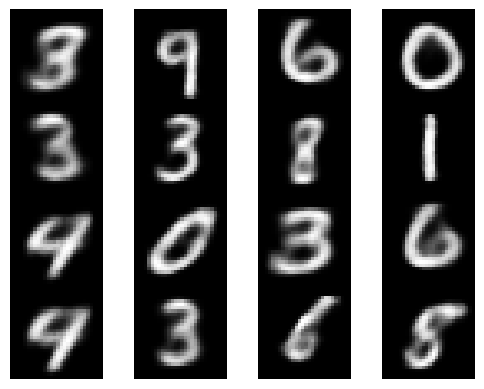

----------- EPOCH 27 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.1590


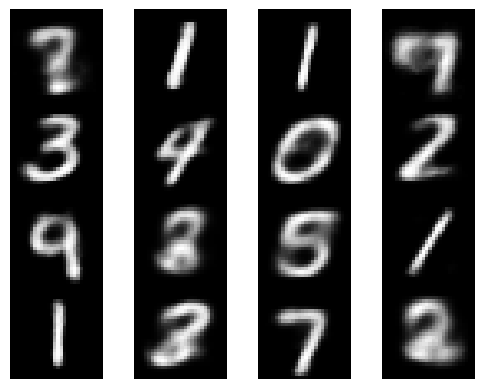

----------- EPOCH 28 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.1588


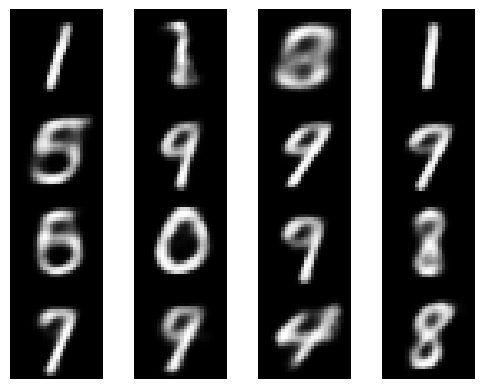

----------- EPOCH 29 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.1586


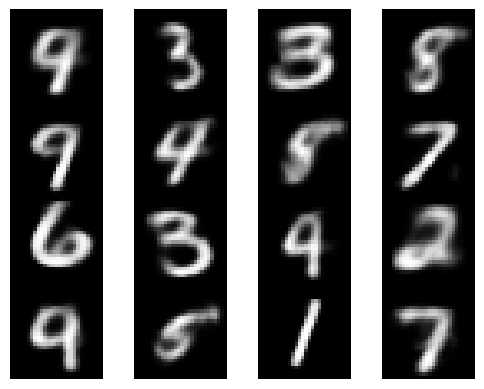

----------- EPOCH 30 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.1583


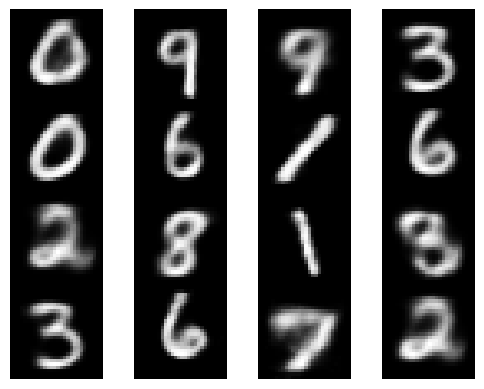

----------- EPOCH 31 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.1581


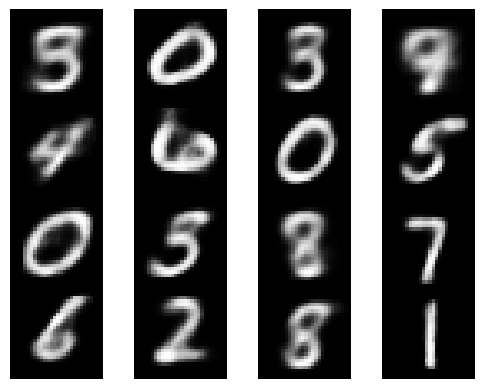

----------- EPOCH 32 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.1578


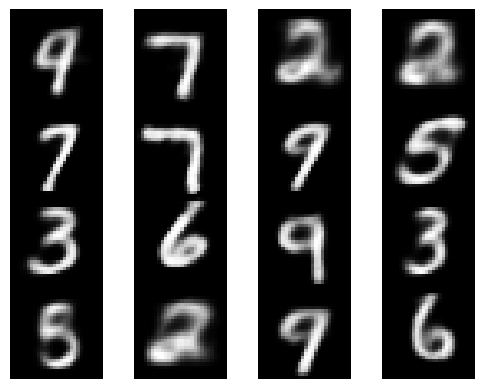

----------- EPOCH 33 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.1576


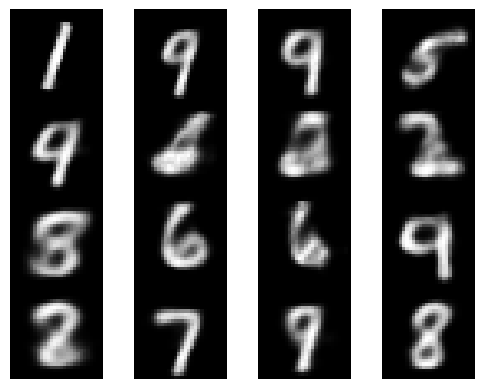

----------- EPOCH 34 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.1573


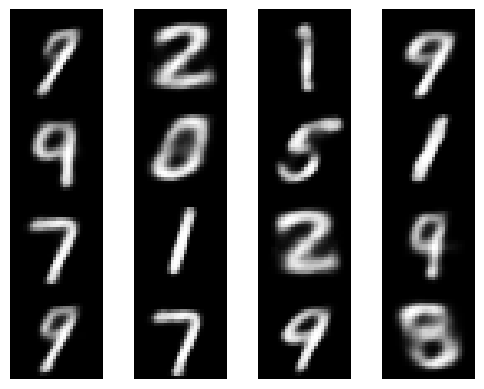

----------- EPOCH 35 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.1571


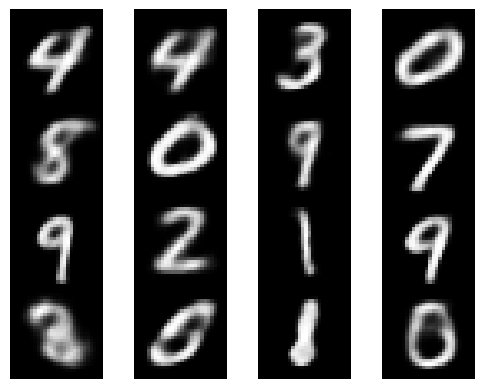

----------- EPOCH 36 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.1569


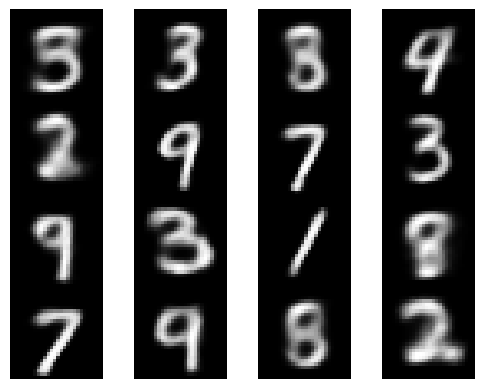

----------- EPOCH 37 -----------
235/235 [==============================] - 1s 6ms/step - loss: 0.1567


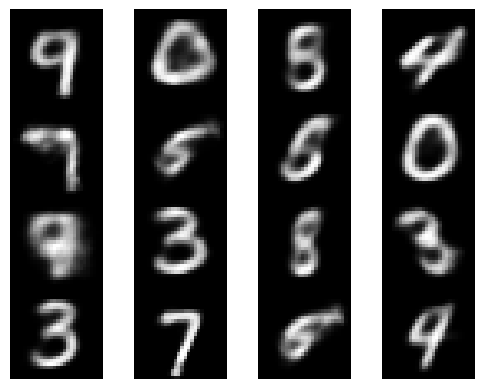

----------- EPOCH 38 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.1566


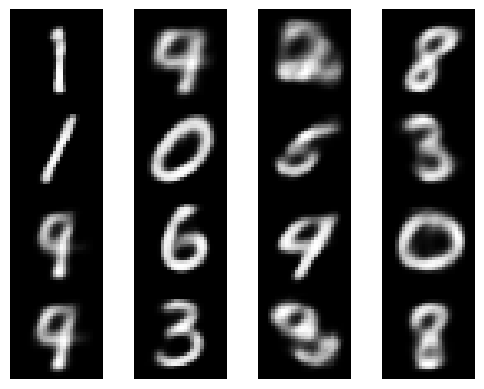

----------- EPOCH 39 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.1565


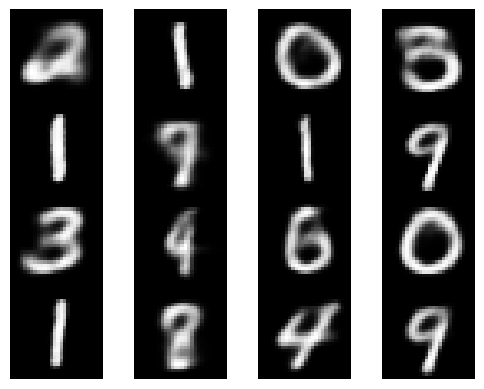

----------- EPOCH 40 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.1562


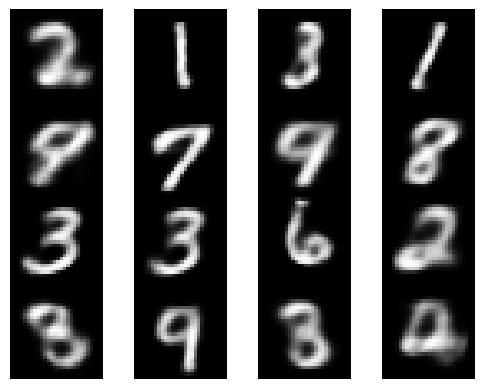

----------- EPOCH 41 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.1561


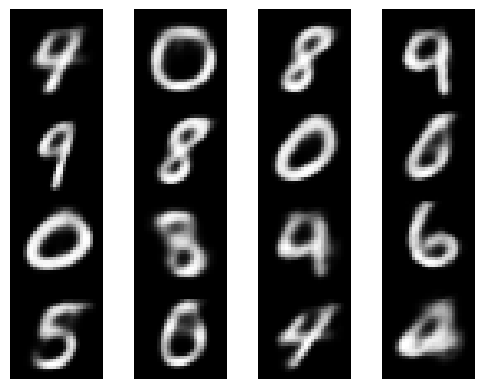

----------- EPOCH 42 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.1560


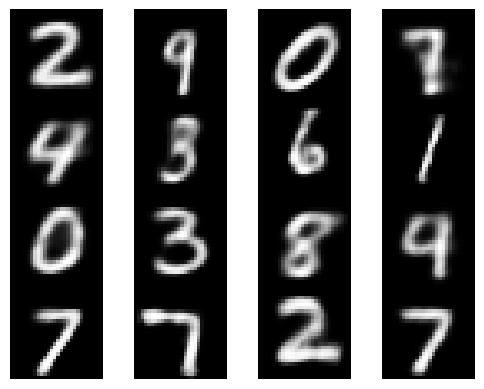

----------- EPOCH 43 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.1559


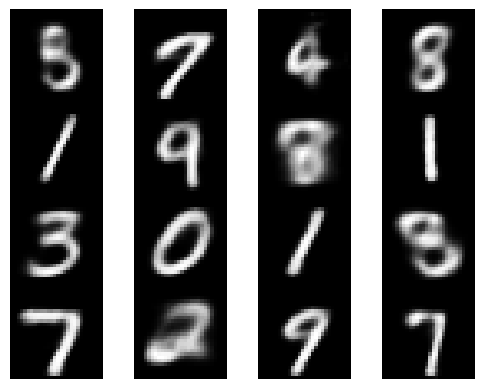

----------- EPOCH 44 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.1556


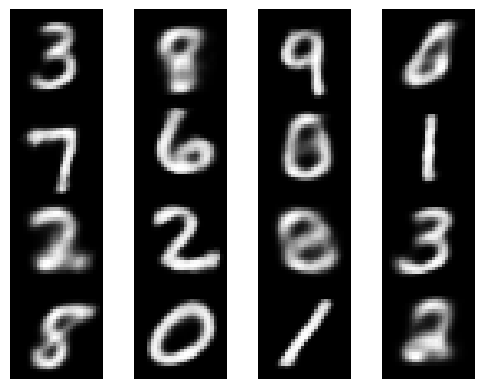

----------- EPOCH 45 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.1556


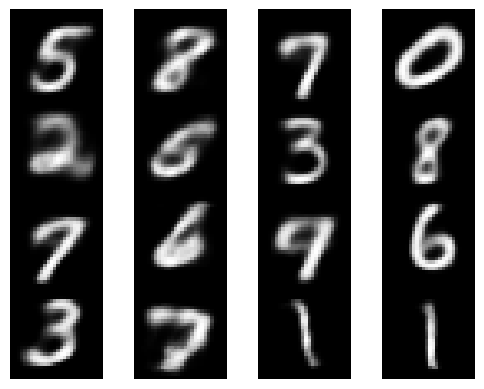

----------- EPOCH 46 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.1554


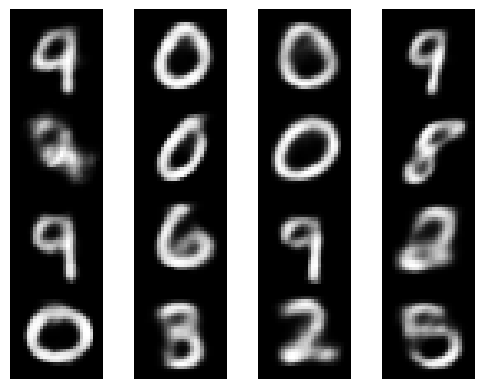

----------- EPOCH 47 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.1552


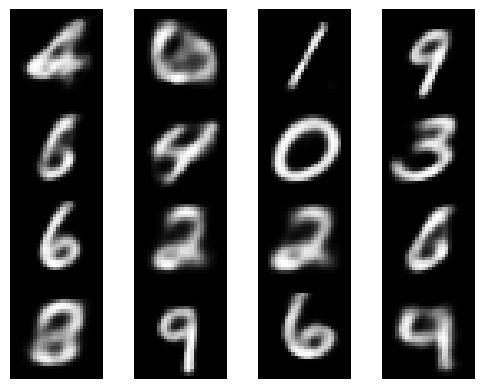

----------- EPOCH 48 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.1552


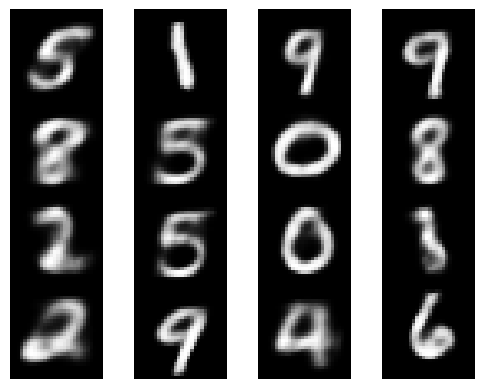

----------- EPOCH 49 -----------
235/235 [==============================] - 1s 5ms/step - loss: 0.1550


In [23]:
# Votre code ici
EPOCHS = 50
for epoch in range(EPOCHS):
    fig, axs = plt.subplots(4, 4)
    rand = X_test[numpy.random.randint(0, 10000, 16)].reshape(4, 4, -1)
    
    
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(autoencoder.predict(rand[i, j].reshape(1,-1)).reshape(28,28), cmap = "gray")
            axs[i, j].axis("off")
    
    plt.subplots_adjust(wspace = 0, hspace = 0)
    plt.show()
    print("-----------", "EPOCH", epoch, "-----------")
    autoencoder.fit(X_train, X_train,batch_size=256, epochs=1, )

## Prédiction sur du bruit blanc

Pour une première utilisation du décodeur, on peut regarder ce qu'il prédit sur du bruit blanc en entrée.

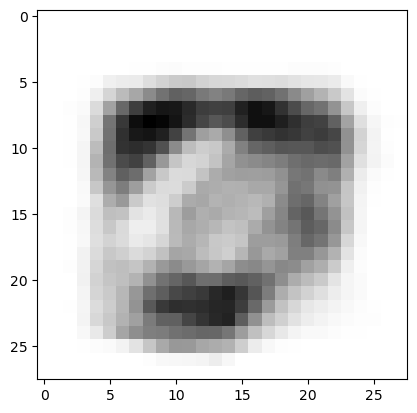

In [51]:
white_noise = numpy.random.random_sample((1, encoding_dim))
plt.imshow(decoder.predict(white_noise).reshape(28, 28), cmap="gray_r")
plt.show()

## Encodage des données de test

On peut aussi, grâce à l'encodeur récupéré, encoder nos données de test vers l'espace de dimension `encoding_dim` appris.

In [54]:
codes = encoder.predict(X_test)
codes.shape

(10000, 4)

(10000, 4)


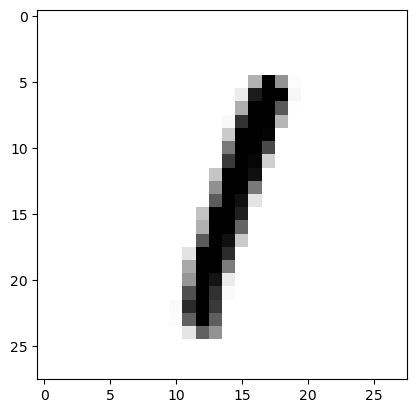

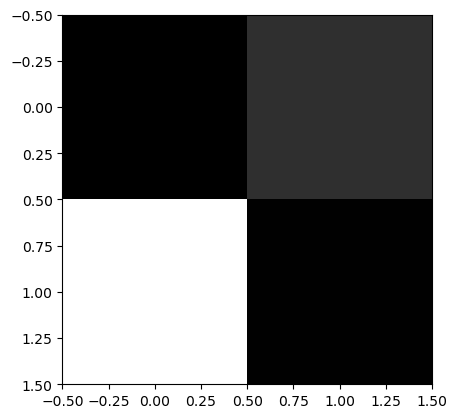

In [55]:
print(codes.shape)
plt.imshow(X_test[5].reshape(28, 28), cmap="gray_r")
plt.show()

plt.imshow(codes[5].reshape(2, 2), cmap="gray_r")
plt.show()